# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [82]:
! wget https://github.com/VladVslv/HSE_ML_projects/raw/data/train.csv

--2023-05-18 18:13:25--  https://github.com/VladVslv/HSE_ML_projects/raw/data/train.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/VladVslv/HSE_ML_projects/data/train.csv [following]
--2023-05-18 18:13:25--  https://raw.githubusercontent.com/VladVslv/HSE_ML_projects/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987712 (965K) [text/plain]
Saving to: ‘train.csv.16’

train.csv.16        100%[===================>] 964.56K  --.-KB/s    in 0.01s   

2023-05-18 18:13:25 (98.3 MB/s) - ‘train.csv.16’ saved [987712/987712]



In [83]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

plt.rcParams["figure.figsize"] = [16, 8]

In [84]:
data = pd.read_csv('train.csv')

In [85]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [86]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [87]:
train.isna().sum() # there are missing values

id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

In [88]:
test.isna().sum() # there are missing values

id            0
keyword      17
location    773
text          0
target        0
dtype: int64

In [89]:
train.fillna(' ', inplace=True)
test.fillna(' ', inplace=True)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [90]:
train.groupby(['target'])['target'].count().rename('count')

target
0    3024
1    2305
Name: count, dtype: int64

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [91]:
counter = dict(train.groupby(['keyword'])['keyword'].count().rename('count'))
del counter[' ']
popular_keywords =set([val[1] for val in sorted([(value,key) for key,value in counter.items()])[-10:]])

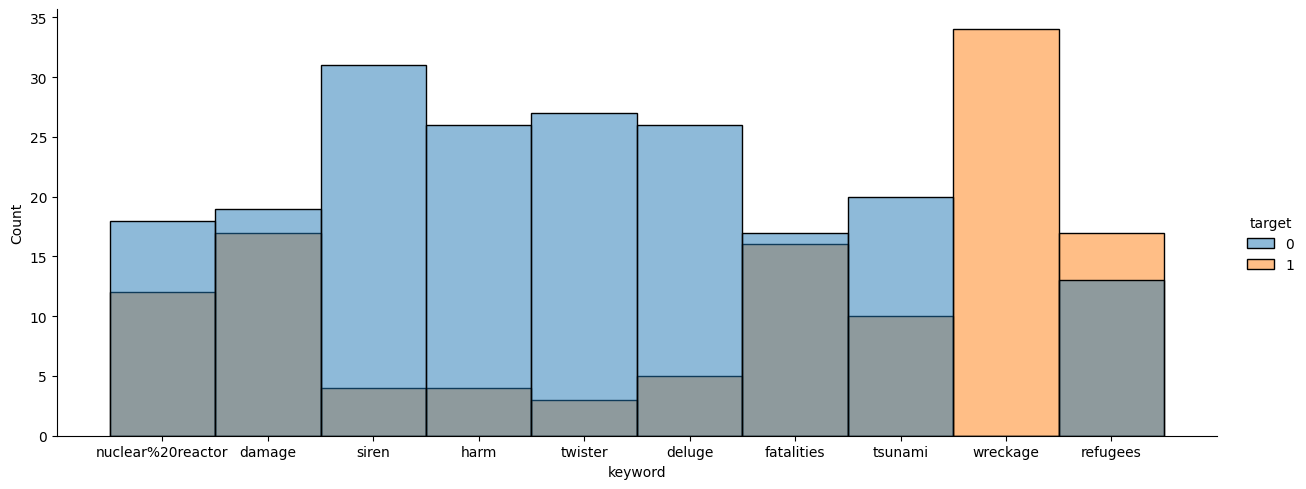

In [92]:
sns.displot(train[train["keyword"].isin(popular_keywords)], x="keyword", hue="target", aspect=2.5)
plt.show()

**Выводы**: wreckage - высокий шанс упоминания о катастрофе

siren, harm, twister, deluge - низкий шанс упоминания о катастрофе

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [93]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [94]:
train["text"] = train["keyword"]+" "+train["location"]+" "+train["text"]
train.drop('keyword', axis=1, inplace=True)
train.drop('location', axis=1, inplace=True)
train.drop('id', axis=1, inplace=True)

In [95]:
train.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a ro...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [96]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train['text'])

In [97]:
# train.drop('text', axis=1, inplace=True)
# text = pd.DataFrame(X.toarray(), columns=cnt_vec.get_feature_names_out())
# pd.concat([text.reset_index(drop=True), train.reset_index(drop=True)], axis=1)

print(f"Matrix size: {len(X.toarray()), len(X.toarray()[0])}")

Matrix size: (5329, 18455)


## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [98]:
from string import punctuation

def contains_digit(s: str) -> bool:
  return any(char.isdigit() for char in s)

def contains_punctuation(s: str) -> bool:
    return any((char in punctuation) for char in s)

def is_hashtag(s: str) -> bool:
    return s[0]=='#'

def is_mention(s: str) -> bool:
    return s[0]=='@'

def investigate_vocabulary(vocabulary):
    print('With digit:      ', sum(1 for i in vocabulary.keys() if contains_digit(i)))
    print('With punctuation:', sum(1 for i in vocabulary.keys() if contains_punctuation(i)))
    print('Hashtags:        ', sum(1 for i in vocabulary.keys() if is_hashtag(i)))
    print('Mentions:        ', sum(1 for i in vocabulary.keys() if is_mention(i)))




In [99]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [100]:
investigate_vocabulary(cnt_vec.vocabulary_)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [101]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [102]:
tknzr = TweetTokenizer()
cnt_vec_tokenizer = CountVectorizer(tokenizer = tknzr.tokenize)
cnt_vec_tokenizer.fit_transform(train['text'])
investigate_vocabulary(cnt_vec_tokenizer.vocabulary_)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


With digit:       3939
With punctuation: 7338
Hashtags:         1470
Mentions:         1679


**Сравнение:** При использовании TweetTokenizer в словарь были добавлены упоминания и хэштеги вместе с символами. А также увеличилось количество знаков пунктуации (которые, например, встречаются в смайликах)


## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [103]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk

def contains_only_latin_letters(s: str) -> bool:
    return all(char.isalpha() for char in s)

def is_emoji(s: str) -> bool:
    return all((char in punctuation) for char in s) and any((char==')' or char=='(') for char in s)

def is_hashtag(s: str) -> bool:
    return s[0]=='#' and contains_only_latin_letters(s[1:])

def custom_tokenizer(s: str) -> List[str]:    
    tmp = TweetTokenizer().tokenize(s)
    res=[]
    for token in tmp:
      t = token.lower()
      if (contains_only_latin_letters(t) or is_emoji(t) or is_hashtag(t)) and (t not in stopwords.words('english')):
        res.append(t)
    stemmer = SnowballStemmer("english")        
    return [stemmer.stem(w) for w in res]

nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [105]:
for i in range(10):
  s = train.iloc[i]['text']
  print(f"Row {i} text: \n{s}\n")
  print(f"Row {i} tokenized: \n{custom_tokenizer(s)}\n\n")

Row 0 text: 
bridge%20collapse   Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

Row 0 tokenized: 
['bridg', 'ash', 'australia', 'ûªs', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']


Row 1 text: 
hail Carol Stream, Illinois GREAT MICHIGAN TECHNIQUE CAMP
B1G THANKS TO @bmurph1019 
@hail_Youtsey . @termn8r13 
#GoBlue #WrestleOn http://t.co/OasKgki6Qj

Row 1 tokenized: 
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']


Row 2 text: 
police Houston  CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNR

Row 2 tokenized: 
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']


Row 3 text: 
rioting   Still rioting in a couple of hours left until I have to be up for class.

Row 3 tokenized: 
['riot', 'still', 'riot', 'cou

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [106]:
y_train = np.array(train['target'])
y_test = np.array(test['target'])

In [107]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer )
X_train = vectorizer.fit_transform(train['text']).toarray()
X_test = vectorizer.transform(test['text']).toarray()

2. Обучите LogisticRegression на полученных признаках.


In [108]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(X_train, y_train)

LogisticRegression()

3. Посчитайте метрику f1-score на тестовых данных.

In [109]:
from sklearn.metrics import f1_score

f1_score(y_test, regression.predict(X_test))

0.7025045815516188

## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
X_train = vectorizer.fit_transform(train['text']).toarray()
X_test = vectorizer.transform(test['text']).toarray()

regression = LogisticRegression()
regression.fit(X_train, y_train)

len(X_train[0])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


10592

In [111]:
f1_score(y_test, regression.predict(X_test))

0.7378299120234605

1. **Ответ:** Качество улучшилось по сравнению с CountVectorizer

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [112]:
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
X_train = vectorizer.fit_transform(train['text']).toarray()
X_test = vectorizer.transform(test['text']).toarray()

regression = LogisticRegression()
regression.fit(X_train, y_train)

len(X_train[0])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


10592

In [113]:
f1_score(y_test, regression.predict(X_test))

0.7378299120234605

2. **Ответ:** Качество не изменилось из-за того, что у всех токенов df меньше 0.9

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [114]:
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9, min_df=0.0003)
X_train = vectorizer.fit_transform(train['text']).toarray()
X_test = vectorizer.transform(test['text']).toarray()

regression = LogisticRegression()
regression.fit(X_train, y_train)

len(X_train[0])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


4555

In [115]:
f1_score(y_test, regression.predict(X_test))

0.7374562427071178

3. **Ответ:** Качество незначительно ухудшилось

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [116]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
X_train = vectorizer.fit_transform(train['text']).toarray()
X_test = vectorizer.transform(test['text']).toarray()

regression = LogisticRegression()
regression.fit(X_train, y_train)

print('F1 score: ', f1_score(y_test, regression.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score:  0.7148736037624928


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** Самый высокий результат показал TfidfVectorizer.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [117]:
from sklearn.linear_model import RidgeClassifier

def custom_tokenizer(s: str) -> List[str]:    
    tmp = TweetTokenizer().tokenize(s)
    res=[]
    for token in tmp:
      t = token.lower()
      if (contains_only_latin_letters(t) or is_emoji(t) or is_hashtag(t)):
        res.append(t)      
    return res

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=0.0003)
X_train = vectorizer.fit_transform(train['text']).toarray()
X_test = vectorizer.transform(test['text']).toarray()

regression = RidgeClassifier()
regression.fit(X_train, y_train)

f1_score(y_test, regression.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.7540255413659078